Find  points  on  quadratic  curves  with  vertical  tangential  vectors.   Find  a  system of  equations,  and  use  Newton’s  method  to  solve  it.   Provide  initial  guesses  eithermanually, or by bisection.

$$ f(x, y) = 0 $$
$$ \frac{\partial f(x, y)}{\partial y} = 0 $$

In [31]:
import numpy as np
import matplotlib.pyplot as plt

class quadratic_curve:
    def __init__(self, A, b, c):
        self.A = A
        self.b = b
        self.c = c
        
    def evaluate(self, xy):
        return xy.T @ self.A @ xy + self.b.T @ xy + self.c
    
    def evaluate_gradient(self, xy):
        x, y = xy
        
        dx = 2*self.A[0,0]*x + 2*self.A[0,1]*y + self.b[0]
        dy = 2*self.A[1,1]*y + 2*self.A[0,1]*x + self.b[1]
        return np.array([dx, dy])
    
    def plot(self, x_min, x_max, y_min, y_max):
        x = np.linspace(x_min, x_max, 100)
        y = np.linspace(y_min, y_max, 100)
        X, Y = np.meshgrid(x, y)
        
        Z = self.A[0,0]*X**2 + 2*self.A[0,1]*X*Y + self.A[1,1]*Y**2 + self.b[0]*X + self.b[1]*Y + self.c
        plt.contour(X, Y, Z, [0])
        
    def find_vertical_tangent_point(self, inital_point, max_iter=30, epsilon=1e-10):
        current_point = inital_point
        point_list = [inital_point]
        
        for iter_idx in range(max_iter):
            value_f = self.evaluate(current_point)
            dy = 2*self.A[1,1]*current_point[1] + 2*self.A[0,1]*current_point[0] + self.b[1]
            current_f = np.vstack((value_f, dy))
            
            grad_f = self.evaluate_gradient(current_point)           
            grad_dx = 2 * self.A[:, 1]

            jacobi = np.vstack((grad_f.T, grad_dx.T))

            updated_point = current_point - np.linalg.inv(jacobi) @ current_f
            point_list.append(updated_point)

            if np.linalg.norm(updated_point - current_point) < epsilon:
                return updated_point, point_list

            current_point = updated_point
           
        return None, point_list


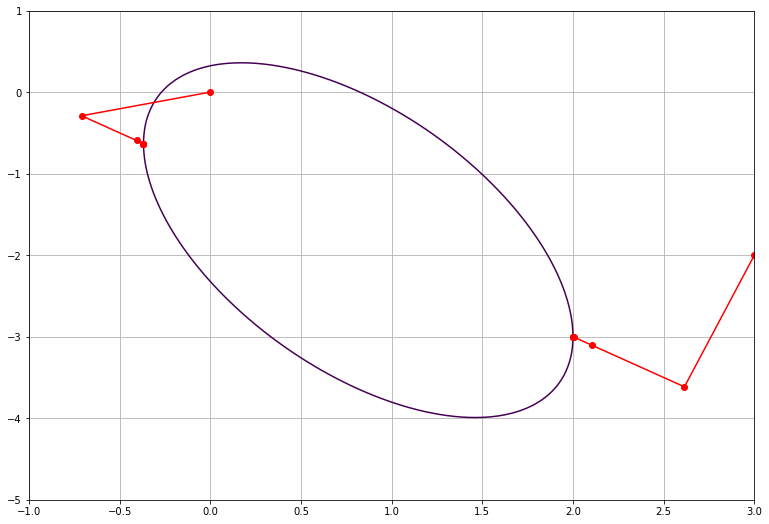

In [34]:
A = np.array([[2.7, 0.8], [0.8, 0.8]])
b = np.array([[-1.5], [1.6]])
c = -0.6
c1 = quadratic_curve(A, b, c)

start_point = np.array([0, 0])[np.newaxis].T
vt_p1, vt_p1_list = c1.find_vertical_tangent_point(start_point)

start_point = np.array([3, -2])[np.newaxis].T
vt_p2, vt_p2_list = c1.find_vertical_tangent_point(start_point)

plt.figure(figsize=(13, 9))
c1.plot(-1, 3, -5, 1)
point_list = np.reshape(np.concatenate(vt_p1_list), (-1, 2))
plt.plot(point_list[:, 0], point_list[:, 1], 'r-o')

point_list = np.reshape(np.concatenate(vt_p2_list), (-1, 2))
plt.plot(point_list[:, 0], point_list[:, 1], 'r-o')
plt.grid()